In [2]:
import pandas as pd
import statistics as s
import scipy.stats as ss
import math
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("salary.csv")  # load data from salary.csv

In [4]:
df.shape

(35, 2)

In [5]:
df.sample(5)

,exp,salary
1,1.3,46205
21,7.1,98273
34,13.5,139465
17,5.3,83088
28,10.3,122391


#### Salary Analsis

In [6]:
df.salary.mean()

83945.6

In [8]:
df['salary'].median()

81363.0

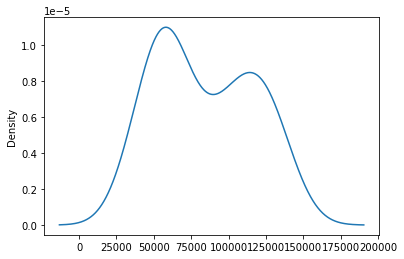

In [7]:
df.salary.plot.kde()

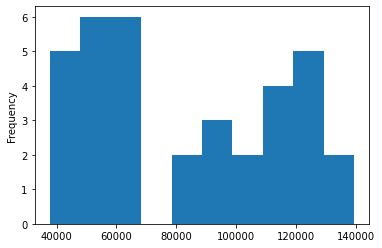

In [8]:
df.salary.plot.hist()

#### Exp Analsis

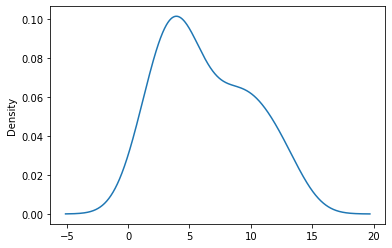

In [11]:
df.exp.plot.kde()

In [12]:
df.exp.mean(), df.exp.median()

(6.308571428571429, 5.3)

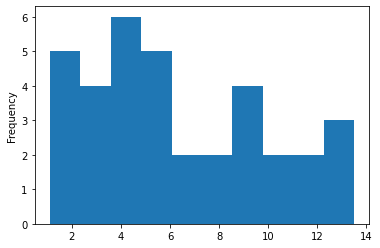

In [9]:
df.exp.plot.hist()

In [12]:
q1 = df.exp.quantile(.25)
q3 = df.exp.quantile(.75)

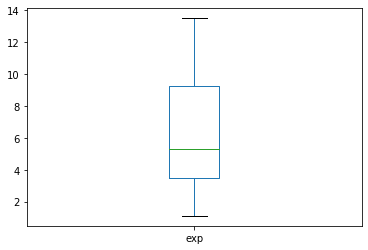

In [10]:
df.exp.plot.box()

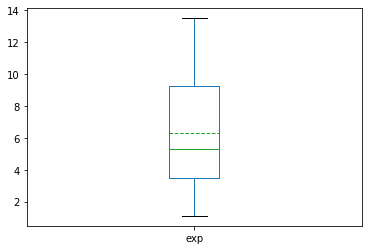

In [12]:
df.exp.plot.box(showmeans=True, meanline =True)

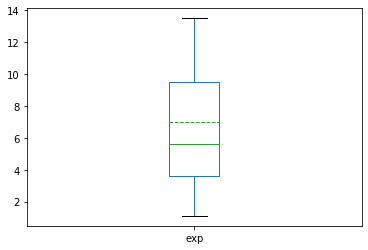

In [21]:
df.exp.plot.box(showmeans=True, meanline=True, showfliers=False)

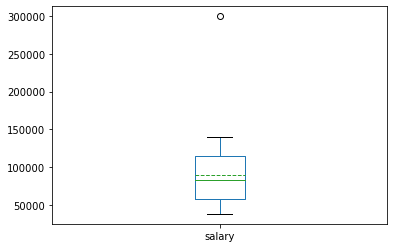

In [17]:
df.salary.plot.box(showmeans=True, meanline=True)

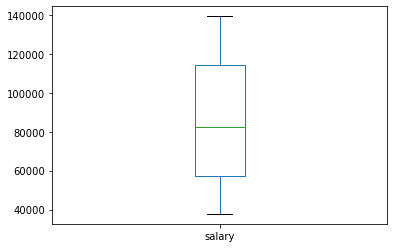

In [18]:
df.salary.plot.box(showfliers = False)

## Correlation 

(0.9827076298239908, 0.017292370176009153)


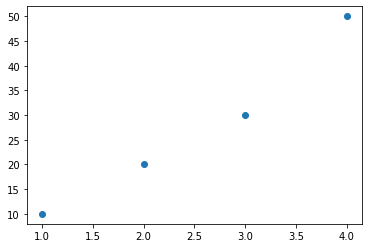

In [3]:
x = [1,2,3,4]
y = [10,20,30,50]
print(ss.pearsonr(x,y))
plt.scatter(x,y)

(-0.9827076298239908, 0.017292370176009153)

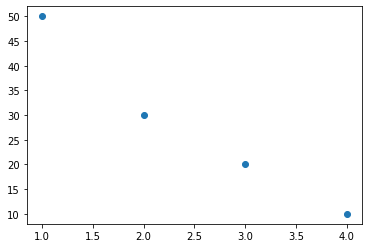

In [4]:
x = [4,3,2,1]
y = [10,20,30,50]
plt.scatter(x,y)
ss.pearsonr(x,y)

(0.7745966692414834, 0.2254033307585166)

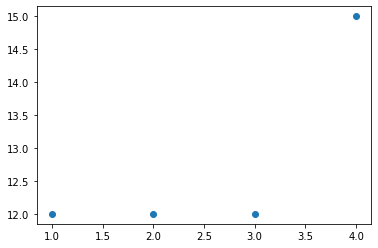

In [9]:
x = [1,2,3,4]
y = [12,12,12,15]
plt.scatter(x,y)
ss.pearsonr(x,y)

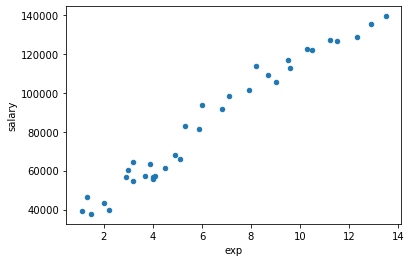

In [14]:
df.plot.scatter(x='exp',y='salary')

In [15]:
(corr,pvalue) = ss.pearsonr(df['exp'], df['salary'])
print(f"{corr * 100:.2f}, {pvalue*100:.2f}")

98.24, 0.00


In [44]:
salaries = [200000,300000,500000,300000,250000,200000]
ages = [20,25,30,40,50,60]

In [45]:
persons =pd.DataFrame( {'salary': salaries, 'age' : ages})

In [46]:
persons

,salary,age
0,200000,20
1,300000,25
2,500000,30
3,300000,40
4,250000,50
5,200000,60


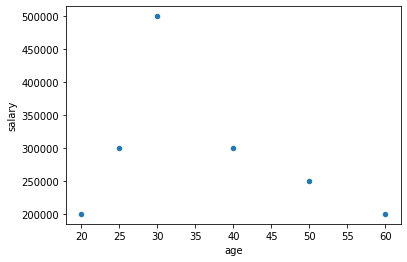

In [47]:
persons.plot.scatter(x = 'age', y = 'salary')

In [48]:
ss.pearsonr(persons['age'], persons['salary'])

(-0.3057207985086441, 0.5557059310405286)

## Regression 

In [16]:
det = ss.linregress(df['exp'], df['salary'])

In [17]:
det

LinregressResult(slope=8731.941047062492, intercept=28859.526194531478, rvalue=0.9824272546479683, pvalue=1.2309905889928102e-25, stderr=288.78315746221443)

In [18]:
exp = 4.5
salary = det.intercept + det.slope * exp
print(exp, salary)

4.5 68153.26090631269


In [19]:
pred_salary = []
for e in df['exp']:
    pred_salary.append(det.intercept + det.slope * e)

In [20]:
df['salary'] - pred_salary

0       878.338654
1      5993.950444
2     -4226.437765
3     -2798.408289
4     -8178.796498
5      2459.844769
6      5094.650664
7     -2356.737545
8      7643.262455
9     -3978.708069
10      303.903722
11    -7993.290383
12    -6830.290383
13    -7579.484487
14    -7042.260906
15    -3708.037325
16    -7363.425535
17     7949.186256
18      985.021628
19    12688.827523
20     3501.274685
21     7416.692371
22     3460.139534
23    13350.557220
24     4603.586696
25    -1864.995618
26     5156.033858
27      -51.160246
28     3592.481021
29     1327.092811
30      687.734078
31    -2520.848236
32    -7497.401073
33    -5826.565702
34    -7275.730330
Name: salary, dtype: float64

In [21]:
mse = ((df['salary'] - pred_salary) ** 2).sum() / len(df)   # Mean Squared Error 
print("MSE  ->", math.floor(mse))
print("RMSE ->", math.floor(math.sqrt(mse)))

MSE  -> 35006768
RMSE -> 5916


### Standard error for gradient

In [ ]:
Formula : sqrt(sum(yi - ypredict) ** 2)/ (n-2) / sqrt(sum((xi - Xmean) ** 2)

In [22]:
diff =  df['salary'] - pred_salary

In [23]:
y_diff = math.sqrt((diff ** 2).sum() / (len(df)- 2))
y_diff

6093.307025620126

In [55]:
xmean = df['exp'].mean()

In [78]:
x_diff = math.sqrt(((df['exp'] - xmean) ** 2).sum())

In [79]:
y_sqrt / x_sqrt

288.78315746221296

### Draw Line Graph showing difference between actual and predicted

In [77]:
df.head()

,exp,salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [29]:
df['predicted'] = pred_salary

In [38]:
df

,exp,salary,predicted
0,1.1,39343,38464.661346
1,1.3,46205,40211.049556
2,1.5,37731,41957.437765
3,2.0,43525,46323.408289
4,2.2,39891,48069.796498
5,2.9,56642,54182.155231
6,3.0,60150,55055.349336
7,3.2,54445,56801.737545
8,3.2,64445,56801.737545
9,3.7,57189,61167.708069


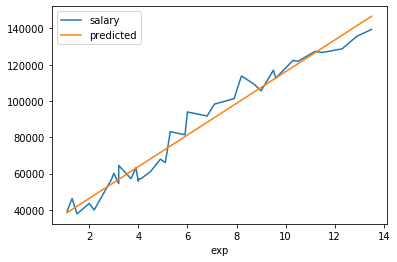

In [30]:
ax = plt.subplot()
df.plot.line(x='exp',y='salary',ax=ax)
df.plot.line(x='exp',y='predicted',ax=ax)